In [2]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import datetime
import pandas as pd
from zipfile import ZipFile
import os 
import glob

In [8]:
#CONFIG FOR TEST
SUB_DF_SIZE = 500

In [5]:
# DataSets Paths

#proyecto de deep learning por horas de 01/08/2018 al 01/08/2019
# 6252 registros
data_path1 = r'forex historic/dukascopy/proj_deep/' 
data_path2 = r'forex historic/dukascopy/2018/' #2018 por horas

cwd = os.getcwd()
source_data = os.path.join(cwd, data_path1)
print('Full path: ', source_data)

Full path:  /Users/marami3/Documents/ITESO/IDI3/forex historic/dukascopy/proj_deep/


In [6]:
#obtiene la lista de archivos CSV's
    
filenames = glob.glob(source_data + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

EURUSD_Candlestick_1_Hour_ASK_31.07.2018-31.07.2019.csv
EURUSD_Candlestick_1_Hour_BID_31.07.2018-31.07.2019.csv


In [9]:
# LOAD CSVs
df_ask = pd.read_csv(filenames[0], index_col=None, header=0)
print(df_ask.head())
df_ask.info()

df_ask_sub = df_ask.iloc[:SUB_DF_SIZE]
print(df_ask_sub.tail())
df_ask_sub.info()

#df_bid = pd.read_csv(filenames[1], index_col=None, header=0)
#print(df_bid.head())
#df_bid.info()

                  Gmt time     Open     High      Low    Close     Volume
0  01.08.2018 00:00:00.000  1.16894  1.16926  1.16885  1.16905  6394.8501
1  01.08.2018 01:00:00.000  1.16905  1.16914  1.16832  1.16895  7304.5498
2  01.08.2018 02:00:00.000  1.16896  1.16920  1.16823  1.16854  6709.3501
3  01.08.2018 03:00:00.000  1.16854  1.16880  1.16799  1.16799  6154.0601
4  01.08.2018 04:00:00.000  1.16799  1.16833  1.16761  1.16779  5269.6699
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6251 entries, 0 to 6250
Data columns (total 6 columns):
Gmt time    6251 non-null object
Open        6251 non-null float64
High        6251 non-null float64
Low         6251 non-null float64
Close       6251 non-null float64
Volume      6251 non-null float64
dtypes: float64(5), object(1)
memory usage: 293.1+ KB
                    Gmt time     Open     High      Low    Close      Volume
495  29.08.2018 15:00:00.000  1.16940  1.17037  1.16883  1.16985  14516.2305
496  29.08.2018 16:00:00.000  1.16987  

In [10]:
class SmaCross(Strategy):
    
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 26
    n2 = 62
    
    def init(self):
        # Precompute two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        # If sma1 crosses above sma2, buy the asset
        if crossover(self.sma1, self.sma2):
            self.buy()

        # Else, if sma1 crosses below sma2, sell it
        elif crossover(self.sma2, self.sma1):
            self.sell()

In [12]:

bt_SmaCross = Backtest(df_ask_sub, SmaCross, cash=10000, commission=.002)
bt_SmaCross.run()

/Users/marami3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Data index is not datetime. Assuming simple periods.
  """Entry point for launching an IPython kernel.


Start                            0
End                            499
Duration                       499
Exposure [%]               63.5271
Equity Final [$]           10133.4
Equity Peak [$]            10230.6
Return [%]                  1.3338
Buy & Hold Return [%]     0.114623
Max. Drawdown [%]         -1.82759
Avg. Drawdown [%]        -0.228937
Max. Drawdown Duration          81
Avg. Drawdown Duration     13.2105
# Trades                         4
Win Rate [%]                    50
Best Trade [%]             1.18375
Worst Trade [%]          -0.845935
Avg. Trade [%]            0.204467
Max. Trade Duration            126
Avg. Trade Duration          79.25
Expectancy [%]            0.960782
SQN                       0.358856
Sharpe Ratio              0.183885
Sortino Ratio              1.61326
Calmar Ratio              0.111878
_strategy                 SmaCross
dtype: object

In [13]:
bt_SmaCross.plot()

In [291]:
#%%time

#stats = bt_SmaCross.optimize(n1=range(30, 300, 1),
#                    n2=range(10, 70, 1),
#                    maximize='Equity Final [$]',
#                    constraint=lambda p: p.n1 < p.n2)
#stats

In [14]:
df_ask_sub.head(10)


,Gmt time,Open,High,Low,Close,Volume
0,01.08.2018 00:00:00.000,1.16894,1.16926,1.16885,1.16905,6394.8501
1,01.08.2018 01:00:00.000,1.16905,1.16914,1.16832,1.16895,7304.5498
2,01.08.2018 02:00:00.000,1.16896,1.16920,1.16823,1.16854,6709.3501
3,01.08.2018 03:00:00.000,1.16854,1.16880,1.16799,1.16799,6154.0601
4,01.08.2018 04:00:00.000,1.16799,1.16833,1.16761,1.16779,5269.6699
5,01.08.2018 05:00:00.000,1.16779,1.16821,1.16761,1.16804,8515.1699
6,01.08.2018 06:00:00.000,1.16805,1.16857,1.16723,1.16821,14354.9902
7,01.08.2018 07:00:00.000,1.16821,1.16942,1.16770,1.16877,14436.9502
8,01.08.2018 08:00:00.000,1.16877,1.16905,1.16815,1.16820,11943.6904
9,01.08.2018 09:00:00.000,1.16820,1.16855,1.16775,1.16831,10390.4805


In [15]:
df_bid = pd.read_csv(filenames[1], index_col=None, header=0)

df_bid_sub = df_bid.iloc[:SUB_DF_SIZE].set_axis(['Gmt_time_bid', 'Open_bid', 'High_bid', 'Low_bid', 'Close_bid', 'Volume_bid'], axis=1, inplace=False)
print(df_bid_sub.head(10))

#df_bid_sub.info()

              Gmt_time_bid  Open_bid  High_bid  Low_bid  Close_bid  Volume_bid
0  01.08.2018 00:00:00.000   1.16890   1.16922  1.16882    1.16900   6778.5200
1  01.08.2018 01:00:00.000   1.16901   1.16911  1.16829    1.16891   7049.4502
2  01.08.2018 02:00:00.000   1.16893   1.16917  1.16820    1.16851   6643.6299
3  01.08.2018 03:00:00.000   1.16850   1.16877  1.16796    1.16797   6649.3599
4  01.08.2018 04:00:00.000   1.16796   1.16830  1.16759    1.16776   5630.1602
5  01.08.2018 05:00:00.000   1.16776   1.16819  1.16759    1.16801   8333.9404
6  01.08.2018 06:00:00.000   1.16800   1.16853  1.16721    1.16818  14850.1699
7  01.08.2018 07:00:00.000   1.16817   1.16938  1.16766    1.16873  13138.6201
8  01.08.2018 08:00:00.000   1.16872   1.16902  1.16812    1.16817  12182.6797
9  01.08.2018 09:00:00.000   1.16816   1.16852  1.16771    1.16827  10230.3398


In [16]:
df_sub_join = df_ask_sub.join(df_bid_sub, how='right', lsuffix='_ask', rsuffix='_bid')
print(df_sub_join.head(5))
df_sub_join.drop("Gmt_time_bid", axis=1, inplace=True)
df_sub_join = df_sub_join.rename(columns={"Gmt time": "Gmt_time","Open":"Open_ask","High":"High_ask","Low":"Low_ask","Close":"Close_ask","Volume":"Volume_ask"})
df_sub_join['Spread']= df_sub_join['High_ask']- df_sub_join['Low_bid']
df_sub_join.head(10)

                  Gmt time     Open     High      Low    Close     Volume  \
0  01.08.2018 00:00:00.000  1.16894  1.16926  1.16885  1.16905  6394.8501   
1  01.08.2018 01:00:00.000  1.16905  1.16914  1.16832  1.16895  7304.5498   
2  01.08.2018 02:00:00.000  1.16896  1.16920  1.16823  1.16854  6709.3501   
3  01.08.2018 03:00:00.000  1.16854  1.16880  1.16799  1.16799  6154.0601   
4  01.08.2018 04:00:00.000  1.16799  1.16833  1.16761  1.16779  5269.6699   

              Gmt_time_bid  Open_bid  High_bid  Low_bid  Close_bid  Volume_bid  
0  01.08.2018 00:00:00.000   1.16890   1.16922  1.16882    1.16900   6778.5200  
1  01.08.2018 01:00:00.000   1.16901   1.16911  1.16829    1.16891   7049.4502  
2  01.08.2018 02:00:00.000   1.16893   1.16917  1.16820    1.16851   6643.6299  
3  01.08.2018 03:00:00.000   1.16850   1.16877  1.16796    1.16797   6649.3599  
4  01.08.2018 04:00:00.000   1.16796   1.16830  1.16759    1.16776   5630.1602  


,Gmt_time,Open_ask,High_ask,Low_ask,Close_ask,Volume_ask,Open_bid,High_bid,Low_bid,Close_bid,Volume_bid,Spread
0,01.08.2018 00:00:00.000,1.16894,1.16926,1.16885,1.16905,6394.8501,1.16890,1.16922,1.16882,1.16900,6778.5200,0.00044
1,01.08.2018 01:00:00.000,1.16905,1.16914,1.16832,1.16895,7304.5498,1.16901,1.16911,1.16829,1.16891,7049.4502,0.00085
2,01.08.2018 02:00:00.000,1.16896,1.16920,1.16823,1.16854,6709.3501,1.16893,1.16917,1.16820,1.16851,6643.6299,0.00100
3,01.08.2018 03:00:00.000,1.16854,1.16880,1.16799,1.16799,6154.0601,1.16850,1.16877,1.16796,1.16797,6649.3599,0.00084
4,01.08.2018 04:00:00.000,1.16799,1.16833,1.16761,1.16779,5269.6699,1.16796,1.16830,1.16759,1.16776,5630.1602,0.00074
5,01.08.2018 05:00:00.000,1.16779,1.16821,1.16761,1.16804,8515.1699,1.16776,1.16819,1.16759,1.16801,8333.9404,0.00062
6,01.08.2018 06:00:00.000,1.16805,1.16857,1.16723,1.16821,14354.9902,1.16800,1.16853,1.16721,1.16818,14850.1699,0.00136
7,01.08.2018 07:00:00.000,1.16821,1.16942,1.16770,1.16877,14436.9502,1.16817,1.16938,1.16766,1.16873,13138.6201,0.00176
8,01.08.2018 08:00:00.000,1.16877,1.16905,1.16815,1.16820,11943.6904,1.16872,1.16902,1.16812,1.16817,12182.6797,0.00093
9,01.08.2018 09:00:00.000,1.16820,1.16855,1.16775,1.16831,10390.4805,1.16816,1.16852,1.16771,1.16827,10230.3398,0.00084


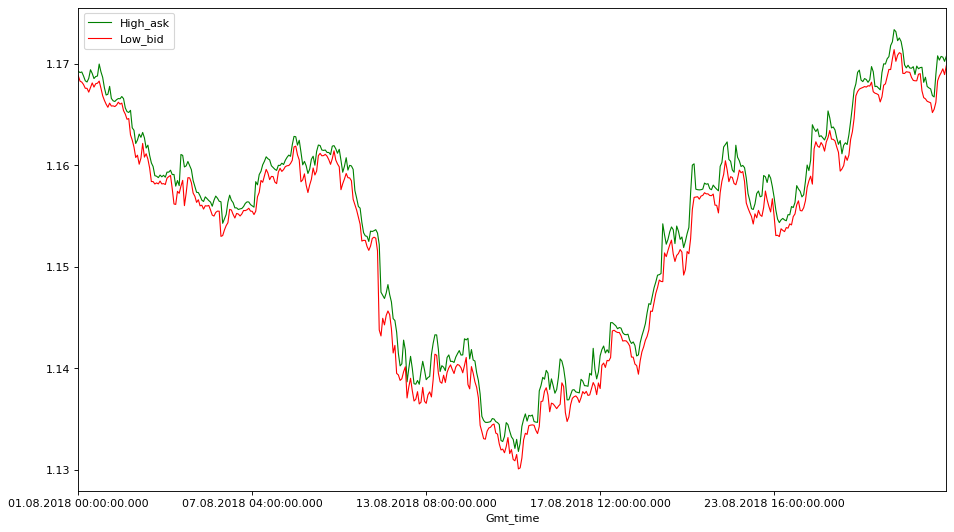

In [17]:
#SPREAD FIG

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
df_sub_join.plot(kind='line',x='Gmt_time',y='High_ask', color='green', ax=ax, linewidth=1)
df_sub_join.plot(kind='line',x='Gmt_time',y='Low_bid', color='red', ax=ax, linewidth=1)
plt.show()

In [18]:
SMA_26 = np.zeros(df_sub_join.shape[0])
SMA_26 = df_sub_join['Close_ask'].rolling(window=26).mean()
df_sub_join['SMA_26'] = SMA_26



SMA_62 = np.zeros(df_sub_join.shape[0])
SMA_62 = df_sub_join['Close_ask'].rolling(window=62).mean()
df_sub_join['SMA_62'] = SMA_62



df_sub_join.head(30)

,Gmt_time,Open_ask,High_ask,Low_ask,Close_ask,Volume_ask,Open_bid,High_bid,Low_bid,Close_bid,Volume_bid,Spread,SMA_26,SMA_62
0,01.08.2018 00:00:00.000,1.16894,1.16926,1.16885,1.16905,6394.8501,1.16890,1.16922,1.16882,1.16900,6778.5200,0.00044,NaN,NaN
1,01.08.2018 01:00:00.000,1.16905,1.16914,1.16832,1.16895,7304.5498,1.16901,1.16911,1.16829,1.16891,7049.4502,0.00085,NaN,NaN
2,01.08.2018 02:00:00.000,1.16896,1.16920,1.16823,1.16854,6709.3501,1.16893,1.16917,1.16820,1.16851,6643.6299,0.00100,NaN,NaN
3,01.08.2018 03:00:00.000,1.16854,1.16880,1.16799,1.16799,6154.0601,1.16850,1.16877,1.16796,1.16797,6649.3599,0.00084,NaN,NaN
4,01.08.2018 04:00:00.000,1.16799,1.16833,1.16761,1.16779,5269.6699,1.16796,1.16830,1.16759,1.16776,5630.1602,0.00074,NaN,NaN
5,01.08.2018 05:00:00.000,1.16779,1.16821,1.16761,1.16804,8515.1699,1.16776,1.16819,1.16759,1.16801,8333.9404,0.00062,NaN,NaN
6,01.08.2018 06:00:00.000,1.16805,1.16857,1.16723,1.16821,14354.9902,1.16800,1.16853,1.16721,1.16818,14850.1699,0.00136,NaN,NaN
7,01.08.2018 07:00:00.000,1.16821,1.16942,1.16770,1.16877,14436.9502,1.16817,1.16938,1.16766,1.16873,13138.6201,0.00176,NaN,NaN
8,01.08.2018 08:00:00.000,1.16877,1.16905,1.16815,1.16820,11943.6904,1.16872,1.16902,1.16812,1.16817,12182.6797,0.00093,NaN,NaN
9,01.08.2018 09:00:00.000,1.16820,1.16855,1.16775,1.16831,10390.4805,1.16816,1.16852,1.16771,1.16827,10230.3398,0.00084,NaN,NaN


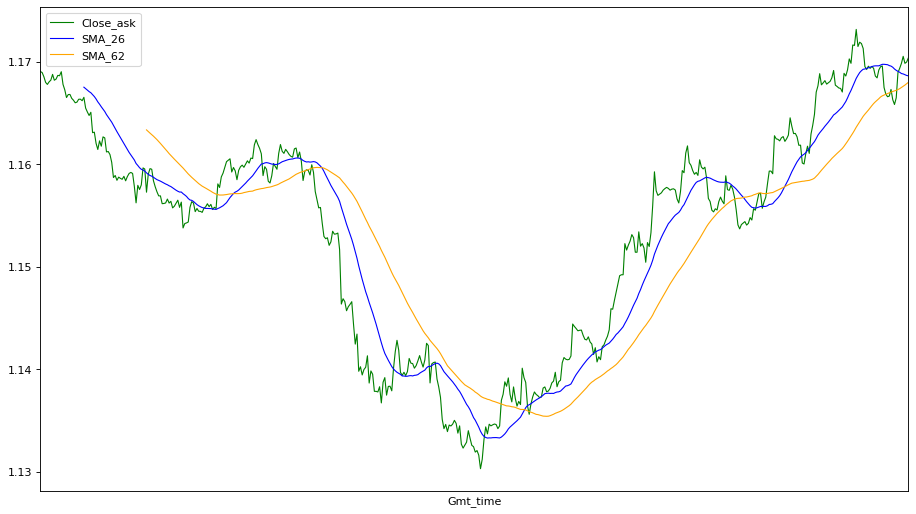

In [19]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
df_sub_join.plot(kind='line',x='Gmt_time',y='Close_ask', color='green', ax=ax, linewidth=1)
df_sub_join.plot(kind='line',x='Gmt_time',y='SMA_26', color='blue', ax=ax, linewidth=1)
df_sub_join.plot(kind='line',x='Gmt_time',y='SMA_62', color='orange', ax=ax, linewidth=1)
plt.xticks([])
plt.show()

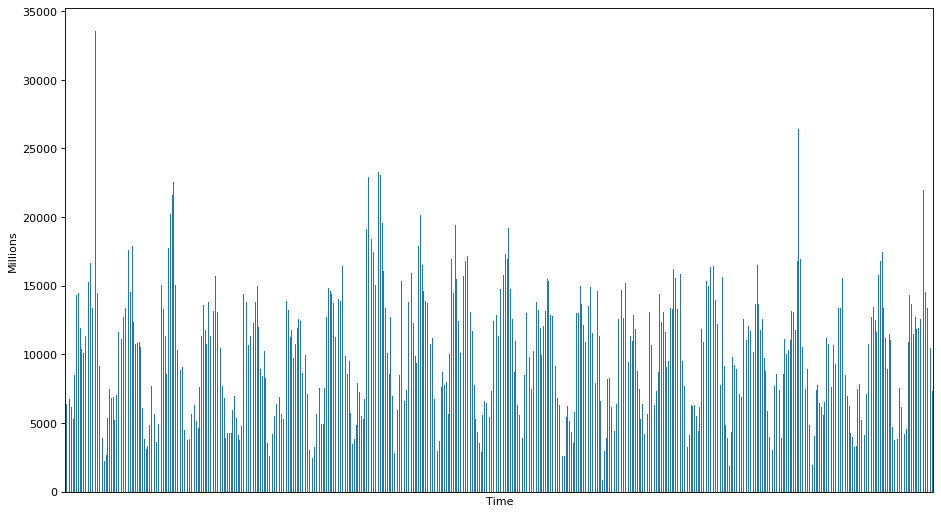

In [20]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
ax.set_ylabel('Millions')
ax.set_xlabel('Time')
df_sub_join['Volume_ask'].plot(kind='bar', ax=ax)
plt.xticks([])
plt.show()

In [21]:
#val = df_sub_join['Gmt_time'][0]
#print(val)
#date = pd.to_datetime(df_sub_join['Gmt_time'][0], format='dd.mm.YYYY HH:mm:ss.sss', errors='ignore')
#date_time_obj['timestamp'] = datetime.datetime.strptime(df_sub_join['Gmt_time'], '%d.%m.%Y %H:%M:%S.%f')
date_series = pd.to_datetime(df_sub_join['Gmt_time'][0])
df_sub_join.tail(10)
#setindex
#re sampling 
#regression\

#RSI, On Balance Volume= OBV, Bolling, 
#prediccion si el siguiente valor, que porcentaje, fuerza de movimiento. y algunos a futuro.
#Que es mejor predecir?? Precio? o algun indicador? 
# Siguiente semana, implementada una estrategia, backtesting y optimizacion. 


#label_sell = df_sub_join.loc[df_sub_join.groupby(pd.Grouper(key='Gmt_time', freq='1h', axis=1))].idxmax().iloc[:, 0]

,Gmt_time,Open_ask,High_ask,Low_ask,Close_ask,Volume_ask,Open_bid,High_bid,Low_bid,Close_bid,Volume_bid,Spread,SMA_26,SMA_62
490,29.08.2018 10:00:00.000,1.16729,1.16753,1.16619,1.16630,11845.6299,1.16726,1.16751,1.16616,1.16627,12160.4004,0.00137,1.169468,1.167103
491,29.08.2018 11:00:00.000,1.16630,1.16687,1.16523,1.16583,11941.9697,1.16627,1.16684,1.16520,1.16581,12296.1201,0.00167,1.169297,1.167157
492,29.08.2018 12:00:00.000,1.16582,1.16674,1.16558,1.16648,12603.3301,1.16581,1.16672,1.16552,1.16644,13146.5303,0.00122,1.169167,1.167216
493,29.08.2018 13:00:00.000,1.16647,1.16896,1.16623,1.16895,16797.6797,1.16644,1.16891,1.16621,1.16890,17663.7500,0.00275,1.169063,1.167287
494,29.08.2018 14:00:00.000,1.16899,1.17079,1.16834,1.16937,21966.3496,1.16893,1.17076,1.16832,1.16935,21609.9707,0.00247,1.168978,1.167379
495,29.08.2018 15:00:00.000,1.16940,1.17037,1.16883,1.16985,14516.2305,1.16938,1.17035,1.16880,1.16982,14527.8896,0.00157,1.168850,1.167489
496,29.08.2018 16:00:00.000,1.16987,1.17073,1.16917,1.17053,13384.4404,1.16985,1.17071,1.16912,1.17050,13261.1396,0.00161,1.168813,1.167611
497,29.08.2018 17:00:00.000,1.17051,1.17066,1.16953,1.16985,9175.7900,1.17048,1.17063,1.16951,1.16982,10129.0303,0.00115,1.168734,1.167726
498,29.08.2018 18:00:00.000,1.16985,1.17024,1.16896,1.16998,10494.2598,1.16982,1.17021,1.16894,1.16995,9431.6299,0.00130,1.168665,1.167858
499,29.08.2018 19:00:00.000,1.16997,1.17075,1.16983,1.17039,7316.4600,1.16995,1.17071,1.16981,1.17036,8000.0098,0.00094,1.168630,1.167995


                  Gmt_time  Close_ask
0  01.08.2018 00:00:00.000    1.16905
1  01.08.2018 01:00:00.000    1.16895
2  01.08.2018 02:00:00.000    1.16854
3  01.08.2018 03:00:00.000    1.16799
4  01.08.2018 04:00:00.000    1.16779
(500, 2)
(500, 2)
max:  1.17316
min:  1.13028
setenta:  1.160296
treinta:  1.143144
                  Gmt_time  Close_ask      high       low
0  01.08.2018 00:00:00.000    1.16905  1.160296  1.143144
1  01.08.2018 01:00:00.000    1.16895  1.160296  1.143144
2  01.08.2018 02:00:00.000    1.16854  1.160296  1.143144
3  01.08.2018 03:00:00.000    1.16799  1.160296  1.143144
4  01.08.2018 04:00:00.000    1.16779  1.160296  1.143144


/Users/marami3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/marami3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


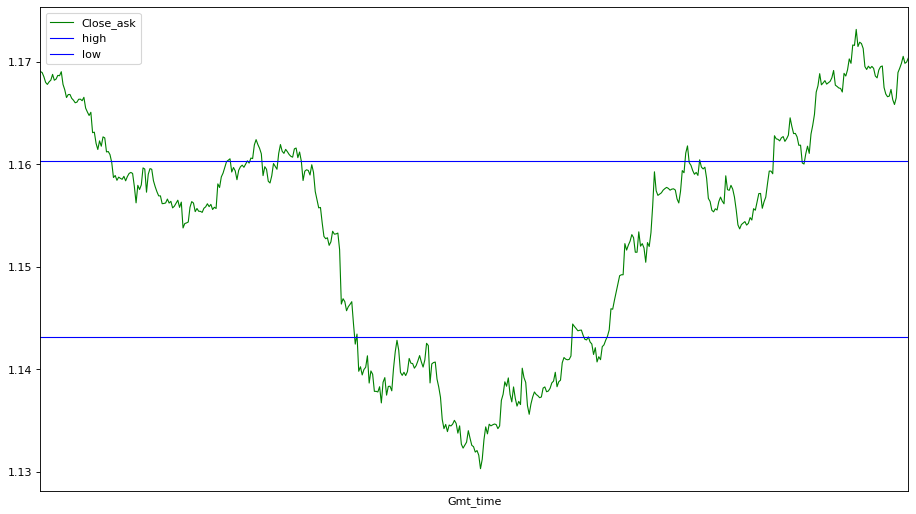

In [22]:
df_close_ask = df_sub_join.iloc[:,[0,4]]
df_close_ask_serie= df_close_ask.squeeze()
print(df_close_ask_serie.head())
print(df_close_ask_serie.shape)
df_close_ask_serie2 = df_close_ask_serie.iloc[:500,:]  # se pretende usar 7200 minutos, correspondientes por semana
print(df_close_ask_serie2.shape)

close_max = df_close_ask_serie2['Close_ask'].max()
close_min = df_close_ask_serie2['Close_ask'].min()
print('max: ', close_max)
print('min: ', close_min)



setenta = (((close_max-close_min)*70)/100)+close_min
trinta = (((close_max-close_min)*30)/100)+close_min
print('setenta: ', setenta)
print('treinta: ', trinta)
df_close_ask_serie2['high'] = setenta
df_close_ask_serie2['low'] = trinta

print(df_close_ask_serie2.head())

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
df_close_ask_serie2.plot(kind='line',x='Gmt_time',y='Close_ask', color='green', ax=ax, linewidth=1)
df_close_ask_serie2.plot(kind='line',x='Gmt_time',y='high', color='blue', ax=ax, linewidth=1)
df_close_ask_serie2.plot(kind='line',x='Gmt_time',y='low', color='blue', ax=ax, linewidth=1)
plt.xticks([])
plt.show()

In [330]:
#   Wilder consideró que si el RSI alcanza el nivel de 70 hay que interpretar que el valor está sobrecomprado 
#   (cuyo significado es que el especulador debería plantearse vender). Y análogamente al contrario, sobrevendido
#   en el nivel de 30. La hipótesis sería que cuando hay una alta proporción de movimientos diarios en una dirección
#   esto sugiere que se alcanzará el extremo, y los precios tenderán a darse la vuelta. También se usan los niveles 
#   80 y 20, u otros, de acuerdo a las condiciones del mercado

SyntaxError: invalid syntax (<ipython-input-330-1c19d0f3f824>, line 1)

In [302]:
def get_rsi_timeseries(prices, n=14):
    # RSI = 100 - (100 / (1 + RS))
    # where RS = (Wilder-smoothed n-period average of gains / Wilder-smoothed n-period average of -losses)
    # Note that losses above should be positive values
    # Wilder-smoothing = ((previous smoothed avg * (n-1)) + current value to average) / n
    # For the very first "previous smoothed avg" (aka the seed value), we start with a straight average.
    # Therefore, our first RSI value will be for the n+2nd period:
    #     0: first delta is nan
    #     1:
    #     ...
    #     n: lookback period for first Wilder smoothing seed value
    #     n+1: first RSI

    # First, calculate the gain or loss from one price to the next. The first value is nan so replace with 0.
    deltas = (prices-prices.shift(1)).fillna(0)

    # Calculate the straight average seed values.
    # The first delta is always zero, so we will use a slice of the first n deltas starting at 1,
    # and filter only deltas > 0 to get gains and deltas < 0 to get losses
    avg_of_gains = deltas[1:n+1][deltas > 0].sum() / n
    avg_of_losses = -deltas[1:n+1][deltas < 0].sum() / n

    # Set up pd.Series container for RSI values
    rsi_series = pd.Series(0.0, deltas.index)

    # Now calculate RSI using the Wilder smoothing method, starting with n+1 delta.
    up = lambda x: x if x > 0 else 0
    down = lambda x: -x if x < 0 else 0
    i = n+1
    for d in deltas[n+1:]:
        avg_of_gains = ((avg_of_gains * (n-1)) + up(d)) / n
        avg_of_losses = ((avg_of_losses * (n-1)) + down(d)) / n
        if avg_of_losses != 0:
            rs = avg_of_gains / avg_of_losses
            rsi_series[i] = 100 - (100 / (1 + rs))
        else:
            rsi_series[i] = 100
        i += 1

    return rsi_series

In [303]:
rsi = (get_rsi_timeseries(df_close_ask_serie2['Close_ask'],14))/100
print(rsi.tail())

495    0.718248
496    0.639056
497    0.571229
498    0.546254
499    0.504671
dtype: float64


In [316]:
#add RSI column
df_close_ask_serie2['rsi'] = (((close_max-close_min)*rsi))+close_min

#add trade column

df_close_ask_serie2['open_buy'] = np.zeros(df_close_ask_serie2.shape[0])
df_close_ask_serie2['close_buy'] = np.zeros(df_close_ask_serie2.shape[0])

print(df_close_ask_serie2.tail(200))
print(df_close_ask_serie2['rsi'][1])




                    Gmt_time  Close_ask      high       low       rsi  \
300  02.01.2018 03:00:00.000    1.20098  1.202261  1.201329  1.201731   
301  02.01.2018 03:01:00.000    1.20100  1.202261  1.201329  1.201780   
302  02.01.2018 03:02:00.000    1.20100  1.202261  1.201329  1.201780   
303  02.01.2018 03:03:00.000    1.20100  1.202261  1.201329  1.201780   
304  02.01.2018 03:04:00.000    1.20113  1.202261  1.201329  1.202069   
305  02.01.2018 03:05:00.000    1.20126  1.202261  1.201329  1.202255   
306  02.01.2018 03:06:00.000    1.20134  1.202261  1.201329  1.202340   
307  02.01.2018 03:07:00.000    1.20137  1.202261  1.201329  1.202369   
308  02.01.2018 03:08:00.000    1.20158  1.202261  1.201329  1.202523   
309  02.01.2018 03:09:00.000    1.20164  1.202261  1.201329  1.202556   
310  02.01.2018 03:10:00.000    1.20172  1.202261  1.201329  1.202594   
311  02.01.2018 03:11:00.000    1.20163  1.202261  1.201329  1.202389   
312  02.01.2018 03:12:00.000    1.20157  1.202261  

/Users/marami3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/marami3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/marami3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

In [311]:



def get_open_buy_positions(df_close_ask_serie2):
    x = df_close_ask_serie2.shape[0]
    for i in range(x):
        rsi = df_close_ask_serie2['rsi'][i]
        low = df_close_ask_serie2['low'][i]
        close = df_close_ask_serie2['Close_ask'][i]
        if rsi < low and i>14:
            previows = df_close_ask_serie2['Close_ask'][i-1]
            if previows < rsi:
                df_close_ask_serie2['open_buy'][i] = close
            
    #crear nuevo dataframe con valores donde aplica la regla
    non_zero = (df_close_ask_serie2['open_buy'] != 0).values.sum()
    df_open_buy = np.zeros(shape=(2,non_zero))
    #print(df_open_buy)
    k = 0
    
    for i in range(x):
        Gmt_time = df_close_ask_serie2['Gmt_time'][i]
        close = df_close_ask_serie2['Close_ask'][i]
        o_buy = df_close_ask_serie2['open_buy'][i]
        if o_buy > 0:
            df_open_buy[0][k] = i
            df_open_buy[1][k] = close
            k+=1
    #print('df_open_buy', df_open_buy)
    return df_open_buy

open_buy_positions = get_open_buy_positions(df_close_ask_serie2)
print(open_buy_positions.shape)

/Users/marami3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/marami3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(2, 17)


In [326]:
def get_close_buy_positions(df_close_ask_serie2):
    x = df_close_ask_serie2.shape[0]
    for i in range(x):
        rsi = df_close_ask_serie2['rsi'][i]
        high = df_close_ask_serie2['high'][i]
        close = df_close_ask_serie2['Close_ask'][i]

        if rsi > high and i > 14:
            previows = df_close_ask_serie2['Close_ask'][i-1]
            if previows > rsi:
                df_close_ask_serie2['close_buy'][i] = close
            
    #crear nuevo dataframe con valores donde aplica la regla
    non_zero = (df_close_ask_serie2['close_buy'] != 0).values.sum()
    df_close_buy = np.zeros(shape=(2,non_zero))
    #print(df_close_buy.shape)
    k = 0
    
    for i in range(x):
        Gmt_time = df_close_ask_serie2['Gmt_time'][i]
        close = df_close_ask_serie2['Close_ask'][i]
        close_buy = df_close_ask_serie2['close_buy'][i]
        if close_buy > 0:
            df_close_buy[0][k] = i
            df_close_buy[1][k] = close
            k+=1
    return df_close_buy

close_buy_positions = get_close_buy_positions(df_close_ask_serie2)
print(close_buy_positions)

/Users/marami3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/marami3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[[198.      485.      486.      487.      488.      493.      494.
  495.     ]
 [  1.20226   1.20273   1.2027    1.20273   1.20269   1.20296   1.2029
    1.2029 ]]


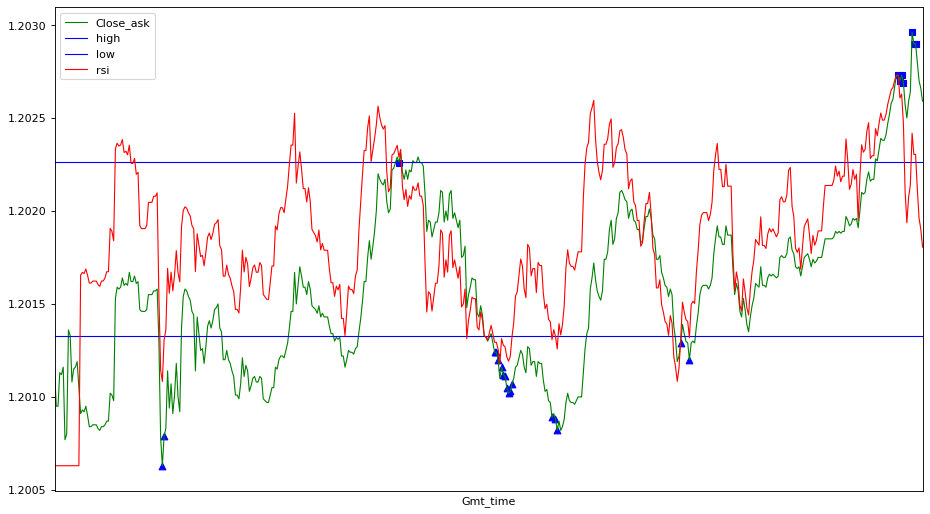

In [329]:
x_axis = range(df_close_ask_serie2.shape[0])
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
df_close_ask_serie2.plot(kind='line',x='Gmt_time',y='Close_ask', color='green', ax=ax, linewidth=1)
df_close_ask_serie2.plot(kind='line',x='Gmt_time',y='high', color='blue', ax=ax, linewidth=1)
df_close_ask_serie2.plot(kind='line',x='Gmt_time',y='low', color='blue', ax=ax, linewidth=1)
df_close_ask_serie2.plot(kind='line',x='Gmt_time',y='rsi', color='red', ax=ax, linewidth=1)
#ptl.scatter
plt.scatter( x= open_buy_positions[0], y = open_buy_positions[1], c = "blue", marker="^",label='entradas_BUY')
plt.scatter( x= close_buy_positions[0], y = close_buy_positions[1], c = "blue", marker="s",label='close_BUY')
plt.xticks([])
plt.show()